# Team 2 - Project Part 4 - A Comprehensive Analysis and Modelling of Diamond

Team members:
1. Srishti Adkar
2. Vandana Gandepalli
3. Sai Vikshit Kode

We want to cluster the dataset into k clusters. Clustering could also help us find potential outliers in the dataset. Use Agglomerative, k-means, mini-batch k-means, and mean-shift clustering methods. Compare the results and select the most suitable clustering method for your dataset.

We then classify the dataset using at least three classification methods, such as: Logistic Regression, K-Nearest Neighbors, Decision Trees, Support Vector Machine, Naive Bayes, and Neural Network.

Discuss the results and show which classification method worked best and the reason.


             

In [ ]:
#Importing necessary libraries
import numpy as np  # NumPy is used for numerical operations
import pandas as pd # Pandas is used for handling tabular data

In [ ]:
# Loading the dataset
df = pd.read_csv("diamonds.csv") # Reads the CSV file into a DataFrame

In [ ]:
# Displaying the first 5 rows to understand the structure of the dataset
df.head()

Shape    Cut Color Clarity  Carat Weight  Length/Width Ratio  \
0  Cushion Modified  Ideal     F    VVS2          1.84                1.02   
1              Pear    NaN     E     VS1          1.20                1.65   
2              Oval    NaN     E     VS1          1.19                1.41   
3             Heart    NaN     D      IF          1.00                1.18   
4           Radiant    NaN     H     VS1          1.01                1.35   

   Depth %  Table %     Polish   Symmetry                        Girdle Culet  \
0     65.8     59.0  Excellent  Very Good               Medium to Thick   NaN   
1     62.5     58.0  Very Good  Very Good               Medium to Thick   NaN   
2     63.1     63.0  Very Good  Very Good               Medium to Thick   NaN   
3     61.7     58.0  Excellent  Excellent  Slightly Thick to Very Thick   NaN   
4     69.4     66.0  Excellent  Very Good                         Thick   NaN   

   Length  Width  Height  Price           Type Fluorescence  
0    7.09   6.95    4.57   2640  GIA Lab-Grown          NaN  
1    9.64   5.86    3.66   1070  GIA Lab-Grown          NaN  
2    8.44   6.00    3.79   1070  GIA Lab-Grown          NaN  
3    5.85   6.89    4.25   7110            GIA        Faint  
4    6.80   5.05    3.50   3050            GIA          NaN

In [ ]:
# Checking the number of rows and columns
df.shape # Returns (rows, columns) in the dataset

(6485, 18)

In [ ]:
# Displaying column types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type  

### Dataset Overview
- The dataset consists of the above shown rows and columns.
- The first few rows show that the dataset includes various features related to diamonds.
- `df.info()` reveals the data types of each column and the presence of missing values.
- If any columns contain `object` data types, they likely need to be converted into numerical values.


# Data Cleaning

Removing unwanted columns and rows

In [ ]:
# Checking the percentage of missing values in each column
df.isnull().sum() / df.shape[0] * 100

Shape                  0.077101
Cut                   66.353123
Color                  0.077101
Clarity                0.077101
Carat Weight           0.077101
Length/Width Ratio     0.077101
Depth %                0.107941
Table %                0.262143
Polish                 0.308404
Symmetry               0.308404
Girdle                 0.339244
Culet                 70.840401
Length                 0.308404
Width                  0.308404
Height                 0.308404
Price                  0.000000
Type                   0.000000
Fluorescence          81.171935
dtype: float64

Since Fluorescence, cut and culet columns has 80 - 90%  data missing, hence we will drop those columns

In [ ]:
# Removing unnecessary columns that might not be useful for analysis
df.drop(["Fluorescence","Culet","Cut"],axis = 1, inplace = True)

In [ ]:
# Checking if there are still missing values
df.isnull().sum()

Shape                  5
Color                  5
Clarity                5
Carat Weight           5
Length/Width Ratio     5
Depth %                7
Table %               17
Polish                20
Symmetry              20
Girdle                22
Length                20
Width                 20
Height                20
Price                  0
Type                   0
dtype: int64

In [ ]:
# Removing rows with missing values to keep the dataset clean
df.dropna(inplace = True)

In [ ]:
# Verifying that there are no missing values left
df.isnull().sum()

Shape                 0
Color                 0
Clarity               0
Carat Weight          0
Length/Width Ratio    0
Depth %               0
Table %               0
Polish                0
Symmetry              0
Girdle                0
Length                0
Width                 0
Height                0
Price                 0
Type                  0
dtype: int64

### Handling Missing Values
- The initial missing values analysis showed that some columns had missing data.
- Columns like `"Fluorescence"`, `"Culet"`, and `"Cut"` were removed as they may not be useful for analysis.
- After using `df.dropna()`, all missing values were removed.
- The dataset is now clean, ensuring that missing values do not affect model training.


In [ ]:
# Checking the updated dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6484
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6463 non-null   object 
 1   Color               6463 non-null   object 
 2   Clarity             6463 non-null   object 
 3   Carat Weight        6463 non-null   float64
 4   Length/Width Ratio  6463 non-null   float64
 5   Depth %             6463 non-null   float64
 6   Table %             6463 non-null   float64
 7   Polish              6463 non-null   object 
 8   Symmetry            6463 non-null   object 
 9   Girdle              6463 non-null   object 
 10  Length              6463 non-null   float64
 11  Width               6463 non-null   float64
 12  Height              6463 non-null   float64
 13  Price               6463 non-null   int64  
 14  Type                6463 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 807.9+ KB


# Label Encoding

In [ ]:
# Encoding categorical (text-based) columns into numeric values
from sklearn.preprocessing import LabelEncoder
def encode_columns(df , column):
  encoder = LabelEncoder() # Creates a label encoder
  df[column] = encoder.fit_transform(df[column]) # Converts text to numbers
  label_mapping = {index : label for index, label in enumerate(encoder.classes_)}
  print(column, label_mapping) # Prints the mapping of categories to numbers

  return df

In [ ]:
# Identifying columns that contain categorical data
object_cols = df.select_dtypes(include = "object").columns.to_list()

# Displaying the dataset again before encoding
object_cols

['Shape', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Girdle', 'Type']

In [ ]:
# Checking the dataset again before encoding
df.head()

Shape Color Clarity  Carat Weight  Length/Width Ratio  Depth %  \
0  Cushion Modified     F    VVS2          1.84                1.02     65.8   
1              Pear     E     VS1          1.20                1.65     62.5   
2              Oval     E     VS1          1.19                1.41     63.1   
3             Heart     D      IF          1.00                1.18     61.7   
4           Radiant     H     VS1          1.01                1.35     69.4   

   Table %     Polish   Symmetry                        Girdle  Length  Width  \
0     59.0  Excellent  Very Good               Medium to Thick    7.09   6.95   
1     58.0  Very Good  Very Good               Medium to Thick    9.64   5.86   
2     63.0  Very Good  Very Good               Medium to Thick    8.44   6.00   
3     58.0  Excellent  Excellent  Slightly Thick to Very Thick    5.85   6.89   
4     66.0  Excellent  Very Good                         Thick    6.80   5.05   

   Height  Price           Type  
0    4.57   2640  GIA Lab-Grown  
1    3.66   1070  GIA Lab-Grown  
2    3.79   1070  GIA Lab-Grown  
3    4.25   7110            GIA  
4    3.50   3050            GIA

In [ ]:
# Encoding all categorical columns using the function defined earlier
for col in object_cols:
  df = encode_columns(df,col)

Shape {0: 'Cushion', 1: 'Cushion Modified', 2: 'Emerald', 3: 'Heart', 4: 'Marquise', 5: 'Oval', 6: 'Pear', 7: 'Princess', 8: 'Radiant', 9: 'Round', 10: 'Square Radiant'}
Color {0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H'}
Clarity {0: 'FL', 1: 'IF', 2: 'VS1', 3: 'VS2', 4: 'VVS1', 5: 'VVS2'}
Polish {0: 'Excellent', 1: 'Good', 2: 'Very Good'}
Symmetry {0: 'Excellent', 1: 'Good', 2: 'Very Good'}
Girdle {0: 'Extremely Thick', 1: 'Extremely Thin to Extremely Thick', 2: 'Extremely Thin to Medium', 3: 'Extremely Thin to Slightly Thick', 4: 'Medium', 5: 'Medium to Extremely Thick', 6: 'Medium to Slightly Thick', 7: 'Medium to Thick', 8: 'Medium to Very Thick', 9: 'Slightly Thick', 10: 'Slightly Thick to Extremely Thick', 11: 'Slightly Thick to Slightly Thick', 12: 'Slightly Thick to Thick', 13: 'Slightly Thick to Very Thick', 14: 'Thick', 15: 'Thick to Extremely Thick', 16: 'Thick to Very Thick', 17: 'Thin', 18: 'Thin to Extremely Thick', 19: 'Thin to Medium', 20: 'Thin to Slightly Thick', 21: 'Thin

### Encoding Categorical Variables
- The dataset contained categorical columns, such as `['Shape', 'Polish', ...]` etc.
- Using `LabelEncoder`, these columns were converted into numerical values for compatibility with machine learning models.
- The printed label mappings indicate how each category was encoded into numbers.
- This transformation is necessary because ML models work better with numerical inputs.


In [ ]:
# Checking the dataset after encoding
df.head()

Shape  Color  Clarity  Carat Weight  Length/Width Ratio  Depth %  Table %  \
0      1      2        5          1.84                1.02     65.8     59.0   
1      6      1        2          1.20                1.65     62.5     58.0   
2      5      1        2          1.19                1.41     63.1     63.0   
3      3      0        1          1.00                1.18     61.7     58.0   
4      8      4        2          1.01                1.35     69.4     66.0   

   Polish  Symmetry  Girdle  Length  Width  Height  Price  Type  
0       0         2       7    7.09   6.95    4.57   2640     1  
1       2         2       7    9.64   5.86    3.66   1070     1  
2       2         2       7    8.44   6.00    3.79   1070     1  
3       0         0      13    5.85   6.89    4.25   7110     0  
4       0         2      14    6.80   5.05    3.50   3050     0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6484
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6463 non-null   int64  
 1   Color               6463 non-null   int64  
 2   Clarity             6463 non-null   int64  
 3   Carat Weight        6463 non-null   float64
 4   Length/Width Ratio  6463 non-null   float64
 5   Depth %             6463 non-null   float64
 6   Table %             6463 non-null   float64
 7   Polish              6463 non-null   int64  
 8   Symmetry            6463 non-null   int64  
 9   Girdle              6463 non-null   int64  
 10  Length              6463 non-null   float64
 11  Width               6463 non-null   float64
 12  Height              6463 non-null   float64
 13  Price               6463 non-null   int64  
 14  Type                6463 non-null   int64  
dtypes: float64(7), int64(8)
memory usage: 807.9 KB


# (a) The mean, median, and standard deviation

Displaying basic statistical properties of the dataset

# Mean

In [ ]:
# Average values for each numerical column
df.mean()

Shape                    5.590593
Color                    1.622621
Clarity                  2.833050
Carat Weight             1.234750
Length/Width Ratio       1.329598
Depth %                 64.208278
Table %                 61.829723
Polish                   0.157512
Symmetry                 0.572799
Girdle                  10.231626
Length                   7.663778
Width                    6.097910
Height                   3.885482
Price                 3527.302027
Type                     0.771623
dtype: float64

# Median

In [ ]:
# Middle value for each column
df.median()

Shape                    6.00
Color                    1.00
Clarity                  2.00
Carat Weight             1.03
Length/Width Ratio       1.27
Depth %                 63.10
Table %                 61.00
Polish                   0.00
Symmetry                 0.00
Girdle                   8.00
Length                   7.42
Width                    5.64
Height                   3.67
Price                 3320.00
Type                     0.00
dtype: float64

# Mode

In [ ]:
# Most frequently occurring values in each column
df.mode().T

0
Shape                  9.00
Color                  1.00
Clarity                2.00
Carat Weight           1.00
Length/Width Ratio     1.01
Depth %               62.80
Table %               58.00
Polish                 0.00
Symmetry               0.00
Girdle                 6.00
Length                 7.47
Width                  5.52
Height                 3.55
Price               1080.00
Type                   0.00

In [ ]:
# Standard deviation, measuring data spread
df.std()

Shape                    2.410731
Color                    1.429915
Clarity                  1.150731
Carat Weight             0.505706
Length/Width Ratio       0.325695
Depth %                  4.774312
Table %                  4.761072
Polish                   0.533851
Symmetry                 0.893553
Girdle                   5.087295
Length                   1.674888
Width                    1.151036
Height                   0.599376
Price                 3275.915447
Type                     0.868917
dtype: float64

In [ ]:
import pandas as pd

# Assuming df is your DataFrame after loading your data
# Let's generate the statistics
desc_stats = df.describe()  # This includes count, mean, std, min, 25%, 50%, 75%, max
modes = df.mode().iloc[0]  # Taking the first mode of each column if there are multiple modes

# Combine the statistics
desc_stats.loc['mode'] = modes  # Add mode row to the describe DataFrame

# Reorder if needed to put 'mode' after 'mean' or in any specific order
# desc_stats = desc_stats.loc[['count', 'mean', 'mode', 'std', 'min', '25%', '50%', '75%', 'max']]

# Print or return the result
desc_stats


Shape        Color      Clarity  Carat Weight  \
count  6463.000000  6463.000000  6463.000000   6463.000000   
mean      5.590593     1.622621     2.833050      1.234750   
std       2.410731     1.429915     1.150731      0.505706   
min       0.000000     0.000000     0.000000      1.000000   
25%       4.000000     0.000000     2.000000      1.010000   
50%       6.000000     1.000000     2.000000      1.030000   
75%       8.000000     3.000000     3.000000      1.190000   
max      10.000000     4.000000     5.000000      9.380000   
mode      9.000000     1.000000     2.000000      1.000000   

       Length/Width Ratio      Depth %      Table %       Polish     Symmetry  \
count         6463.000000  6463.000000  6463.000000  6463.000000  6463.000000   
mean             1.329598    64.208278    61.829723     0.157512     0.572799   
std              0.325695     4.774312     4.761072     0.533851     0.893553   
min              1.000000    46.100000    51.000000     0.000000     0.000000   
25%              1.020000    61.200000    58.000000     0.000000     0.000000   
50%              1.270000    63.100000    61.000000     0.000000     0.000000   
75%              1.510000    67.600000    65.000000     0.000000     2.000000   
max              2.580000    77.000000    78.000000     2.000000     2.000000   
mode             1.010000    62.800000    58.000000     0.000000     0.000000   

            Girdle       Length        Width       Height         Price  \
count  6463.000000  6463.000000  6463.000000  6463.000000   6463.000000   
mean     10.231626     7.663778     6.097910     3.885482   3527.302027   
std       5.087295     1.674888     1.151036     0.599376   3275.915447   
min       0.000000     5.180000     4.420000     2.670000   1010.000000   
25%       6.000000     6.330000     5.390000     3.460000   1210.000000   
50%       8.000000     7.420000     5.640000     3.670000   3320.000000   
75%      13.000000     8.660000     6.600000     4.100000   4390.000000   
max      28.000000    15.210000    14.880000     8.170000  39460.000000   
mode      6.000000     7.470000     5.520000     3.550000   1080.000000   

              Type  
count  6463.000000  
mean      0.771623  
std       0.868917  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       2.000000  
max       2.000000  
mode      0.000000

### Statistical Analysis
- The **mean** values provide an overview of the average diamond attributes.
- The **median** gives the middle value, which helps understand the distribution without being affected by extreme values.
- The **mode** shows the most frequently occurring values in each column.
- The **standard deviation** indicates how much the data varies from the mean. A high standard deviation means the data is spread out, while a low standard deviation suggests that most values are close to the mean.


# (b) Draw boxplots of attributes in one frame.

In [ ]:
# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

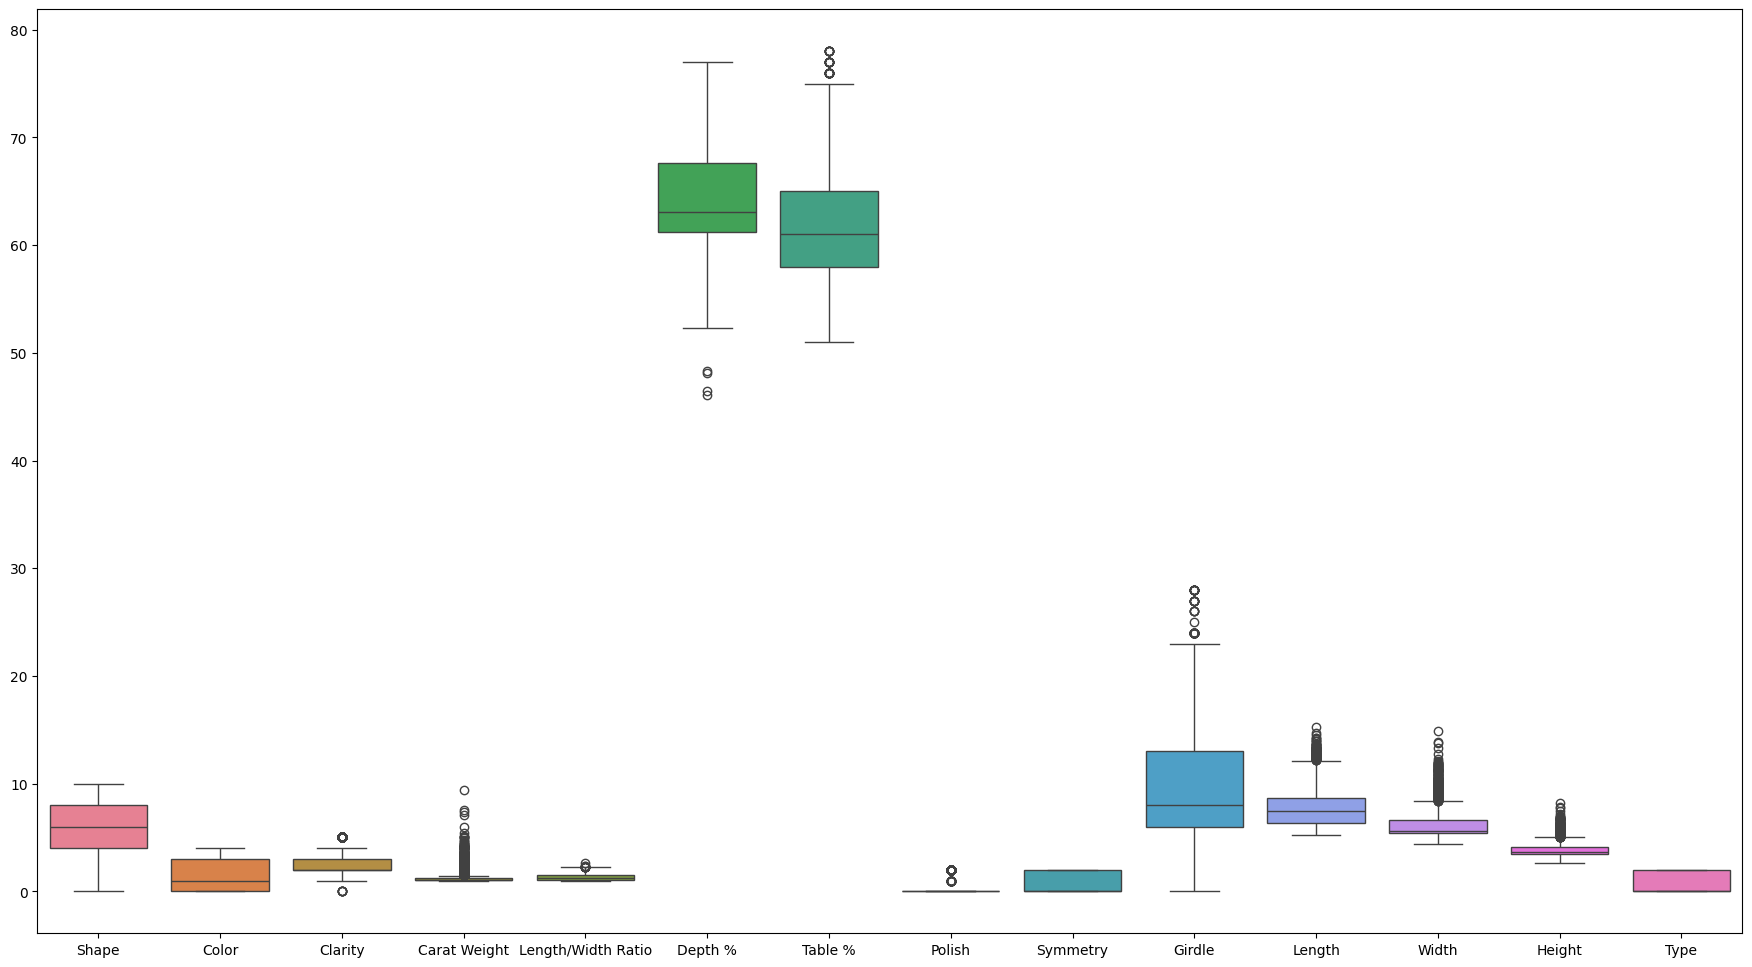

In [ ]:
# Boxplot to visualize data distribution and detect outliers
plt.figure(figsize = (22,12))
sns.boxplot(data = df.drop(["Price"], axis = 1)) # Excluding "Price" column from the boxplot

plt.show()

### Boxplot Analysis
- The boxplot helps in identifying **outliers** (extreme values) in the dataset.
- Some numerical features may have outliers, which can affect model performance.
- If necessary, outliers can be removed or transformed to improve the dataset.


# (c) Draw pairplots.

<Figure size 2200x1200 with 0 Axes>

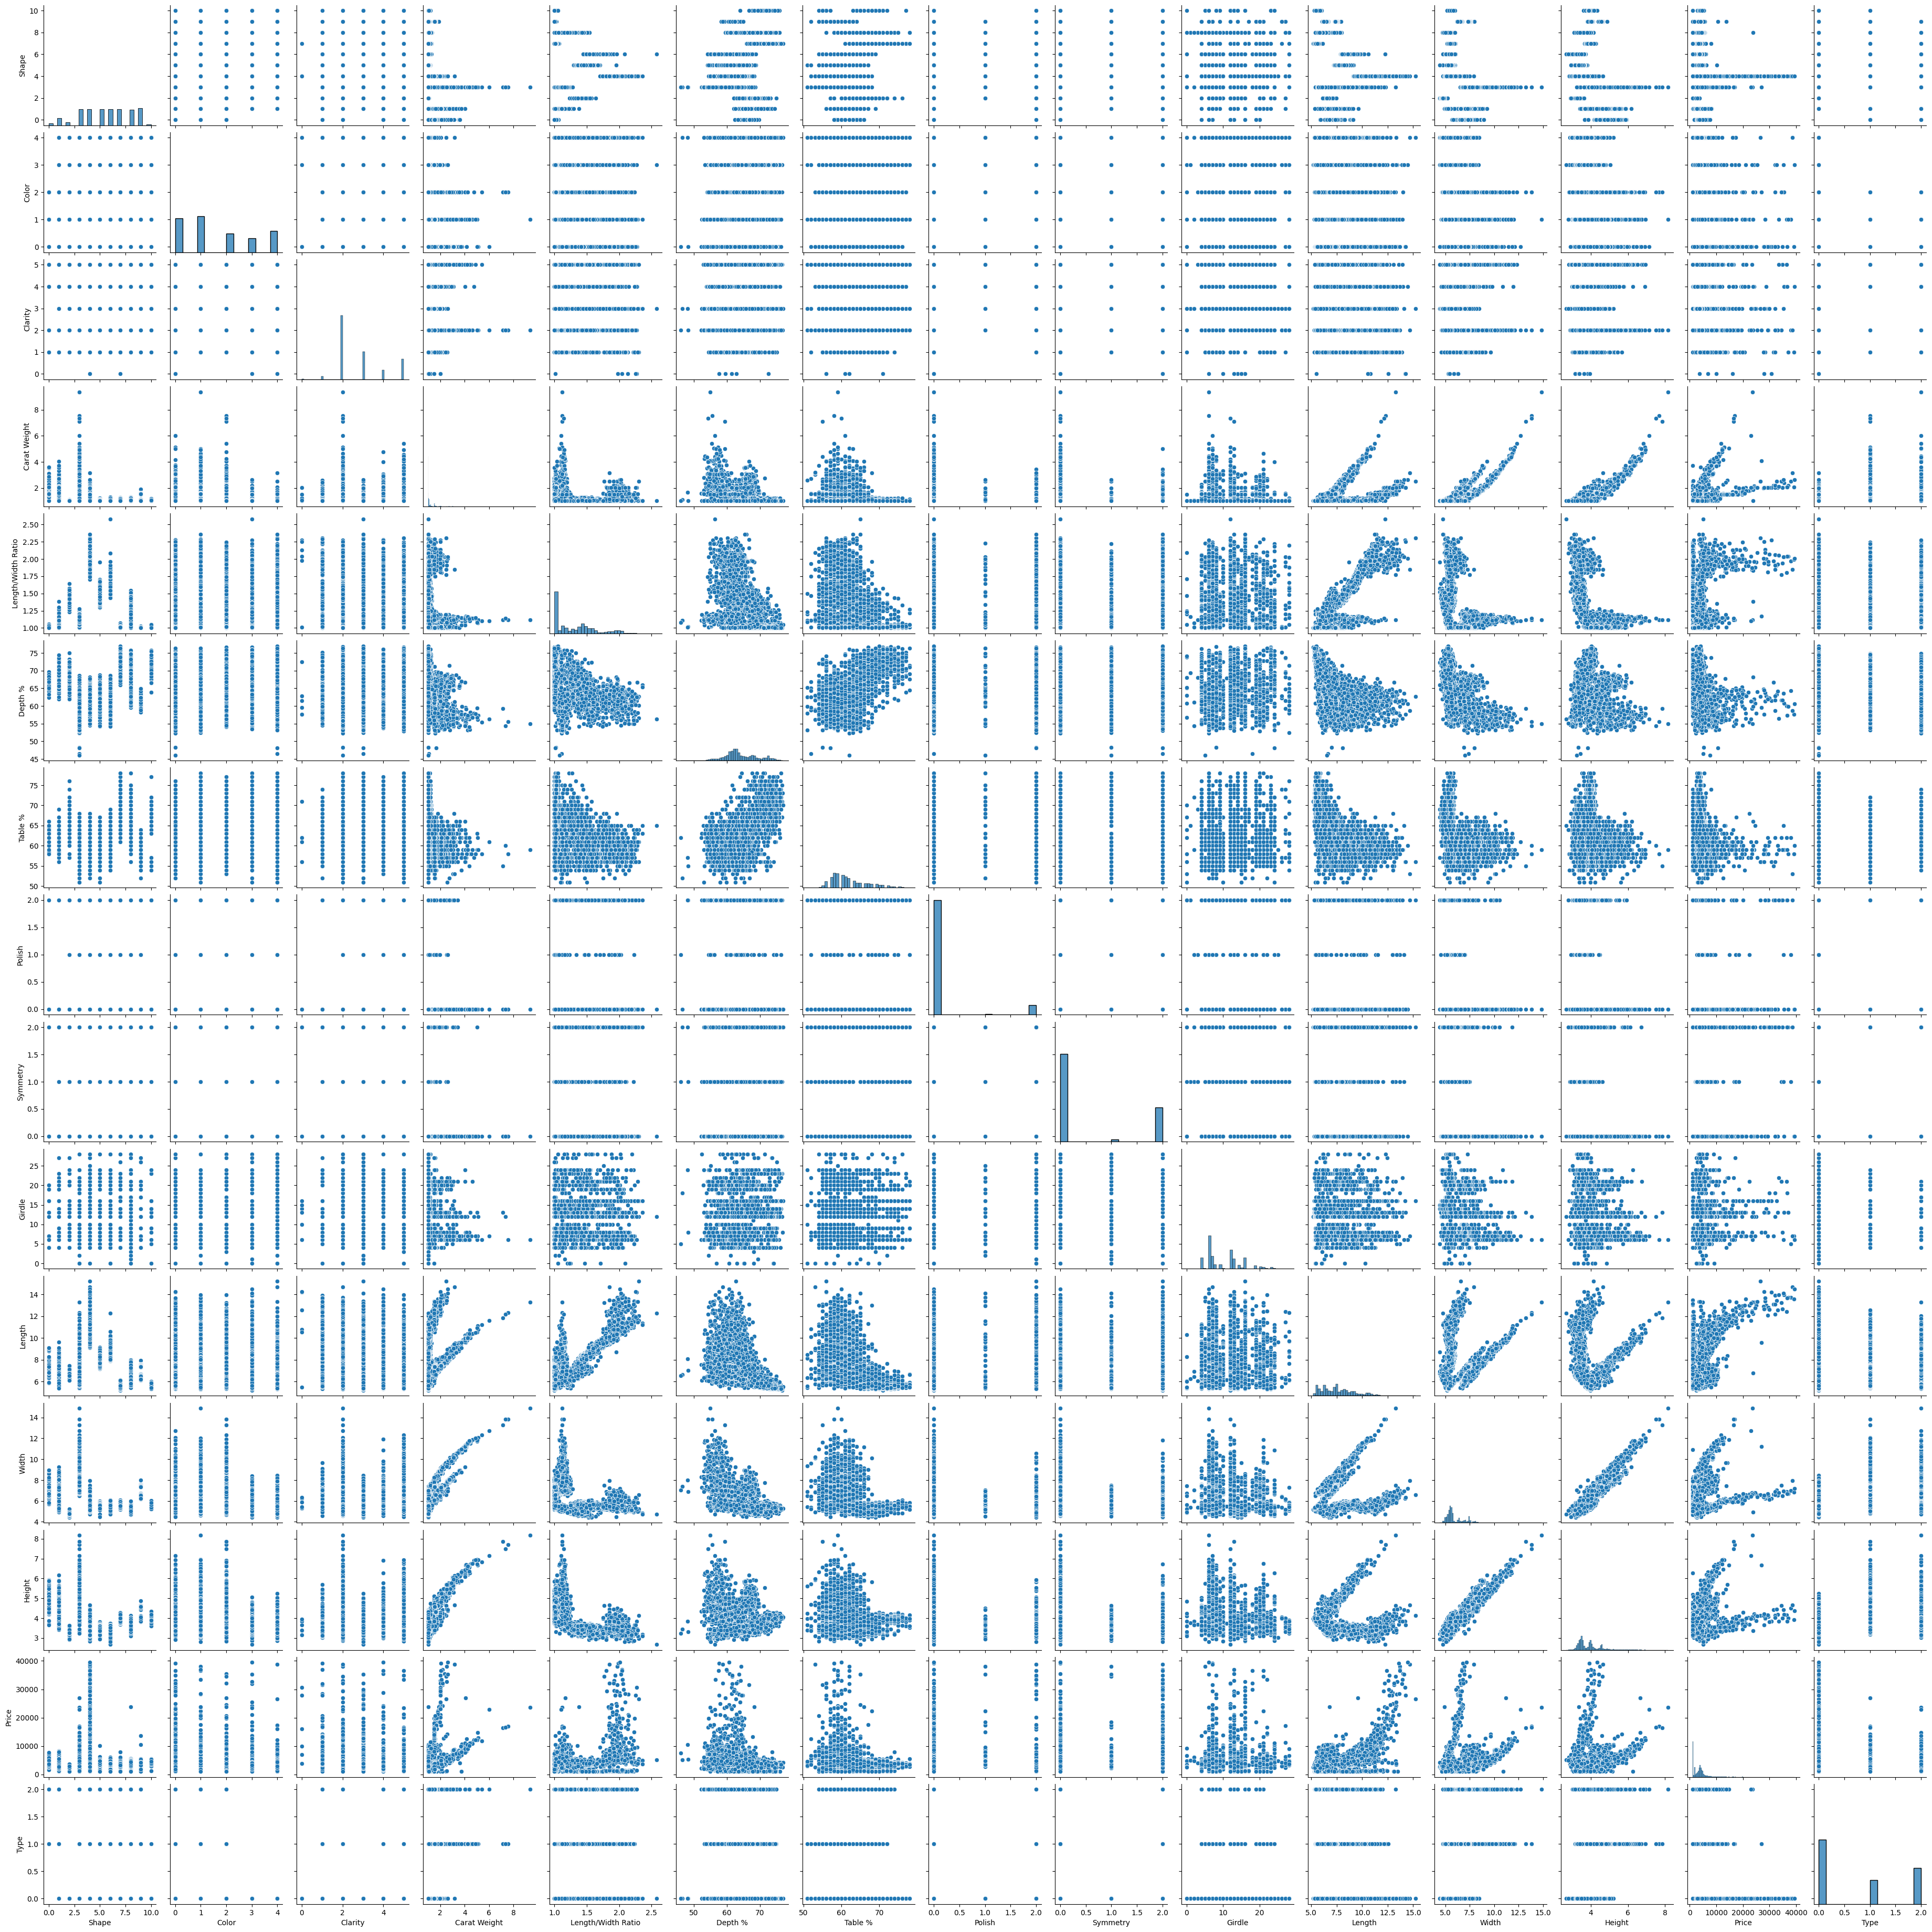

In [ ]:
# Pairplot to visualize relationships between different variables
plt.figure(figsize = (22,12))
sns.pairplot(df)
plt.show()

### Pairplot Insights
- The pairplot provides scatter plots for different numerical variables.
- Some variables might show **strong linear relationships**, while others may have no clear correlation.
- If two features are strongly correlated, one might be redundant and could be removed to simplify the model.


# (d) Calculate the correlation if the scatter plot shows a correlation among variables.


In [ ]:
# Importing Pearson correlation function to measure relationships between numerical variables
from scipy.stats import pearsonr

### Pearson Correlation Analysis
- Pearson correlation measures the strength of relationships between numerical variables.
- A correlation coefficient close to **+1 or -1** indicates a strong relationship.
- Features with high correlation may contain redundant information and can be removed to avoid multicollinearity in machine learning models.


In [ ]:
y_col = "Price"
x_cols = df.drop(["Price"], axis = 1).columns.to_list()
for x in x_cols:
  corr, _ = pearsonr(df[x], df[y_col]) # calculate Pearson's correlation
  print(f"Correlation between {x} and {y_col}: {corr:.3}")

Correlation between Shape and Price: -0.234
Correlation between Color and Price: 0.0728
Correlation between Clarity and Price: 0.0689
Correlation between Carat Weight and Price: 0.369
Correlation between Length/Width Ratio and Price: 0.151
Correlation between Depth % and Price: -0.184
Correlation between Table % and Price: -0.0984
Correlation between Polish and Price: 0.123
Correlation between Symmetry and Price: 0.188
Correlation between Girdle and Price: 0.21
Correlation between Length and Price: 0.315
Correlation between Width and Price: 0.262
Correlation between Height and Price: 0.218
Correlation between Type and Price: -0.439


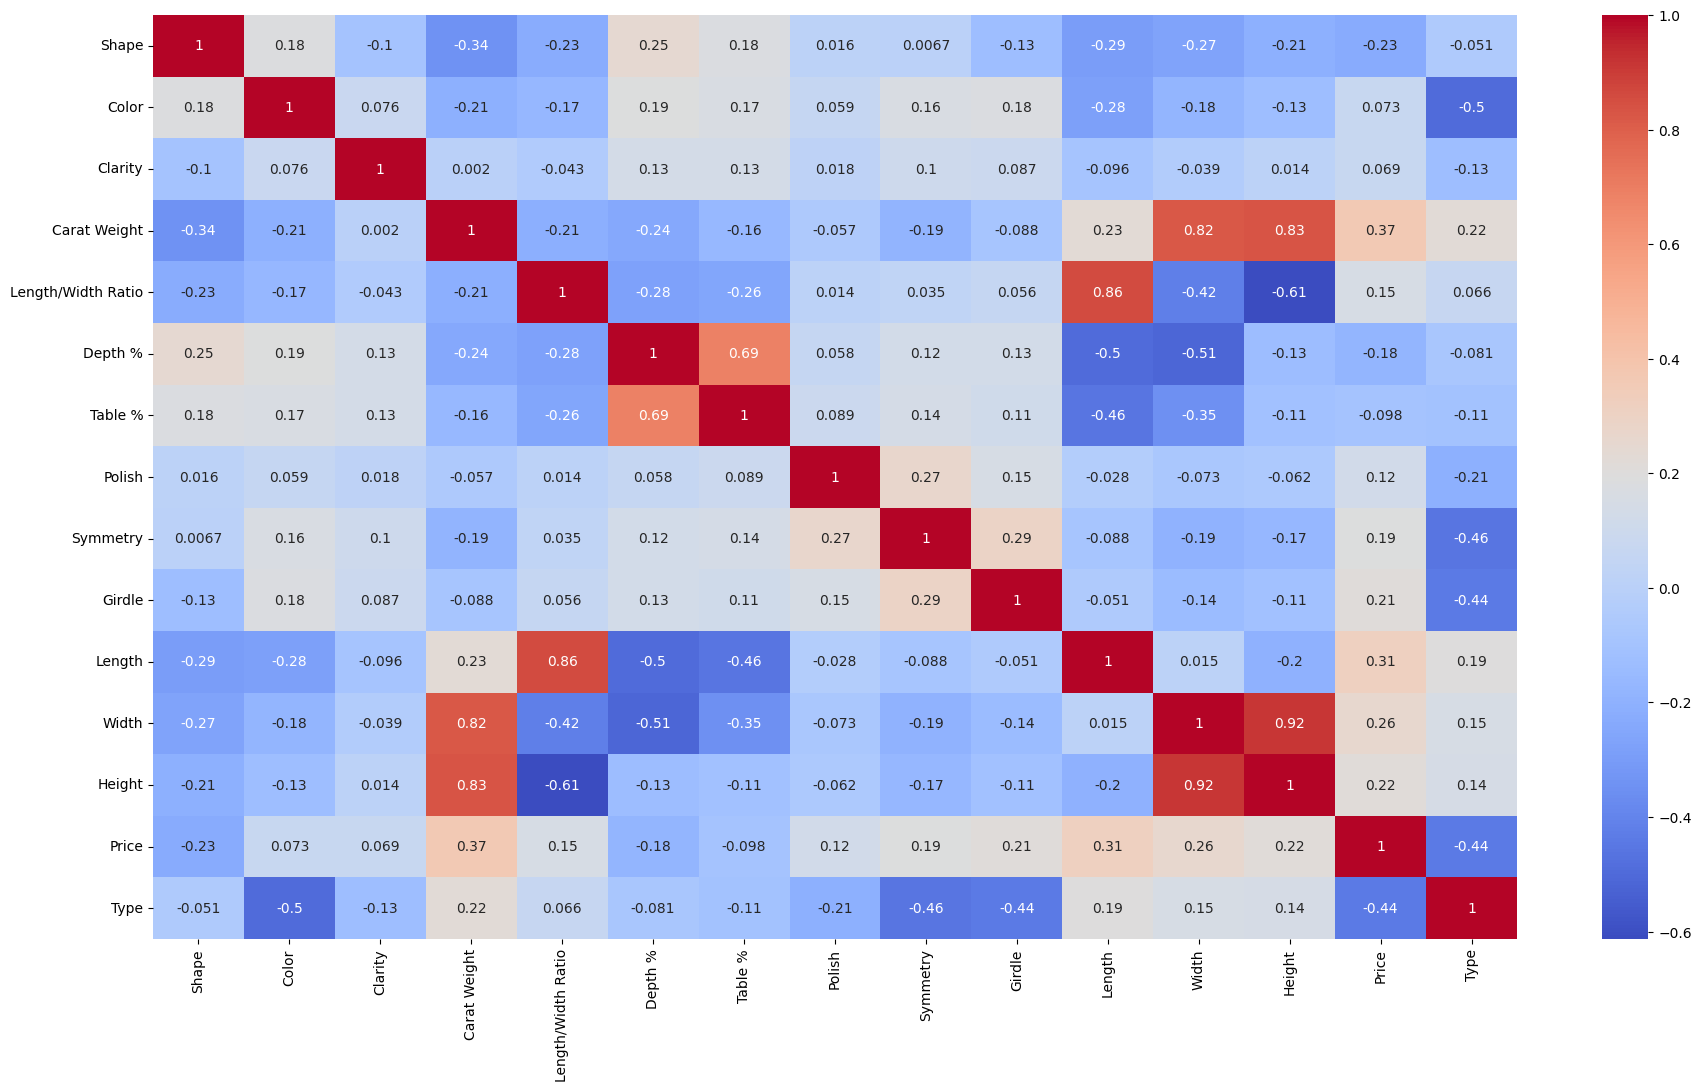

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize = (22,12))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.show()

### Correlation Analysis
- A heatmap of the correlation matrix helps identify relationships between features.
- Strong positive or negative correlations indicate that some features may be redundant.
- Features highly correlated with `"Price"` are important for predictive modeling.
- If two independent features are highly correlated, one may be removed to reduce redundancy.


## Feature Selection

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Dropping categorical columns and explicitly removing 'Price'
X = df.drop(columns=df.select_dtypes(include=['object']).columns.tolist() + ['Price'], errors='ignore')
y = df['Price']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_scaled, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Get top 6 features (excluding Price)
print(feature_scores.head(6))


         Feature        Score
13          Type  1541.321206
3   Carat Weight  1016.672009
10        Length   710.965695
11         Width   474.445056
0          Shape   373.347691
12        Height   323.156772


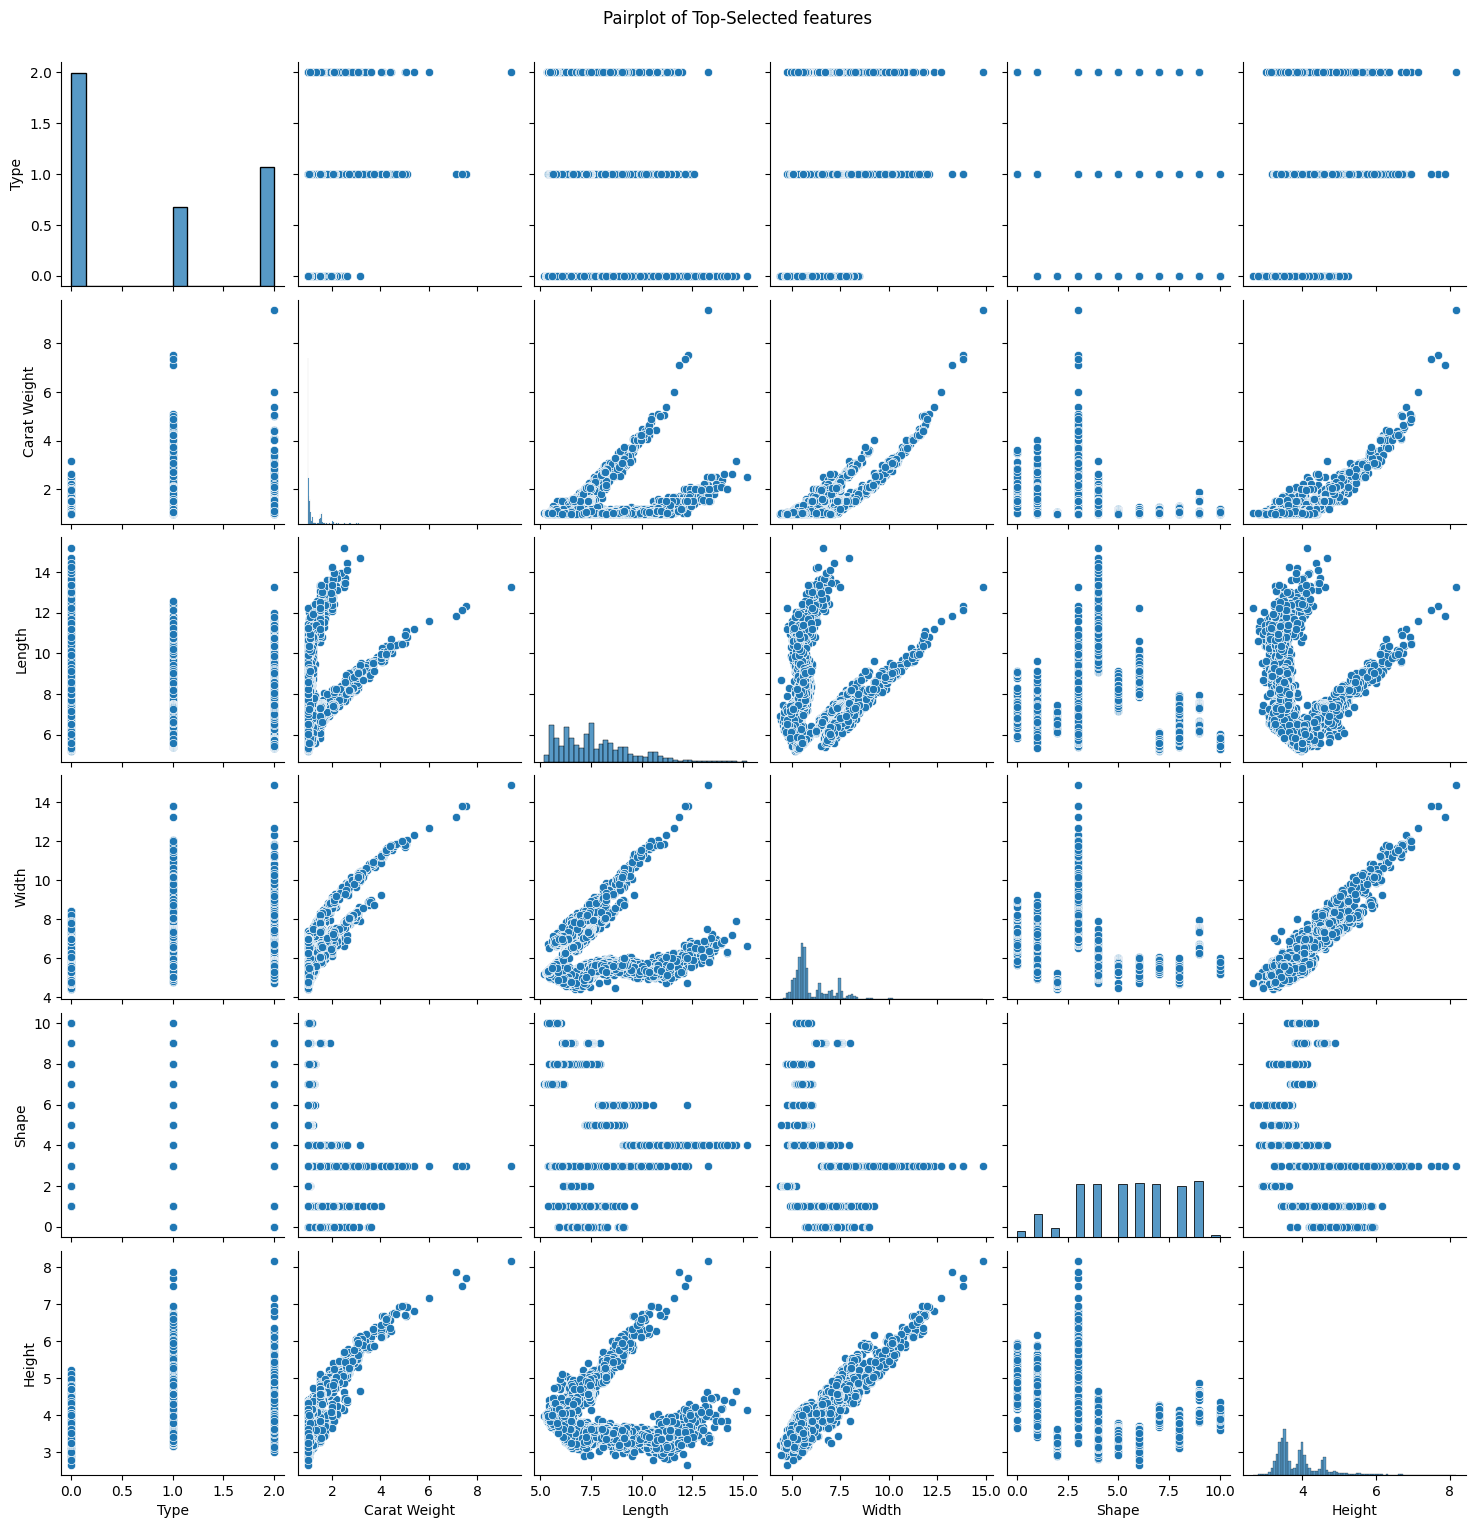

In [ ]:
# Selecting the top 6 features for the model
top_features = ['Type', 'Carat Weight', 'Length', 'Width', 'Shape', 'Height']

sns.pairplot(df[top_features])
plt.suptitle('Pairplot of Top-Selected features', y=1.02)
plt.show()

# Project Part - 3

# Linear Regression

### Splitting data according to dependent and independent values

In [ ]:
X = df.drop(["Price"], axis = 1)
y = df["Price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Splitting Data for Machine Learning
- The dataset is split into **training (80%)** and **testing (20%)** sets.
- This ensures that the model is trained on one part of the data and evaluated on another unseen part.
- `random_state=42` ensures reproducibility.
- The `"Price"` column is the target variable, while all other columns are features.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Training a Linear Regression Model
- A **Linear Regression** model is trained on the dataset.
- The model learns relationships between features and the target variable (`Price`).
- The trained model can now be used to make predictions.


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Model Performance Metrics:")
print("--------------------------------------------")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Linear Regression Model Performance Metrics:
--------------------------------------------
Mean Squared Error (MSE): 6130421.658661929
Root Mean Squared Error (RMSE): 2475.968832328454
R-squared (R2): 0.5137476768614124


### Model Evaluation
- **Mean Absolute Error (MAE):** Measures the average absolute difference between actual and predicted values.
- **Mean Squared Error (MSE):** Measures the squared differences, penalizing larger errors more.
- **R² Score:** Indicates how well the model explains variability in the target variable. Closer to **1** means a better model.
- If the R² score is low, the model may need **feature engineering** or a different algorithm.

Linear Regression Model shows moderate predictive power with an R-squared value of 0.5137, indicating that approximately 51.37% of the variance in the target variable can be explained by the model. The RMSE of 2475.96 suggests that the model's predictions are, on average, within approximately 2475.96 units of the actual values.

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_train)

# Calculate the performance metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

print("Random Forest Regressor Model Performance Metrics:")
print("-------------------------------------------------")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)

Random Forest Regressor Model Performance Metrics:
-------------------------------------------------
Mean Squared Error (MSE): 6130421.658661929
Root Mean Squared Error (RMSE): 2475.968832328454
R-squared (R2): 0.5137476768614124


## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

# Initialize the models
svr_model = SVR()

# Fit the models
svr_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_svr = svr_model.predict(X_test)

# Calculate the performance metrics for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression Model Performance Metrics:")
print("---------------------------------------------------")
print("Mean Squared Error (MSE):", mse_svr)
print("Root Mean Squared Error (RMSE):", rmse_svr)
print("R-squared (R2):", r2_svr)

Support Vector Regression Model Performance Metrics:
---------------------------------------------------
Mean Squared Error (MSE): 12706381.278468596
Root Mean Squared Error (RMSE): 3564.6011387627364
R-squared (R2): -0.007843792703906338


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model with regularization parameter alpha
ridge_model = Ridge(alpha=1.0)  # You can adjust the value of alpha as needed

# Fit the Ridge Regression model
ridge_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate the performance metrics for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model Performance Metrics:")
print("--------------------------------------------")
print("Mean Squared Error (MSE):", mse_ridge)
print("Root Mean Squared Error (RMSE):", rmse_ridge)
print("R-squared (R2):", r2_ridge)


Ridge Regression Model Performance Metrics:
--------------------------------------------
Mean Squared Error (MSE): 6134453.644062311
Root Mean Squared Error (RMSE): 2476.782922272824
R-squared (R2): 0.5134278681472718


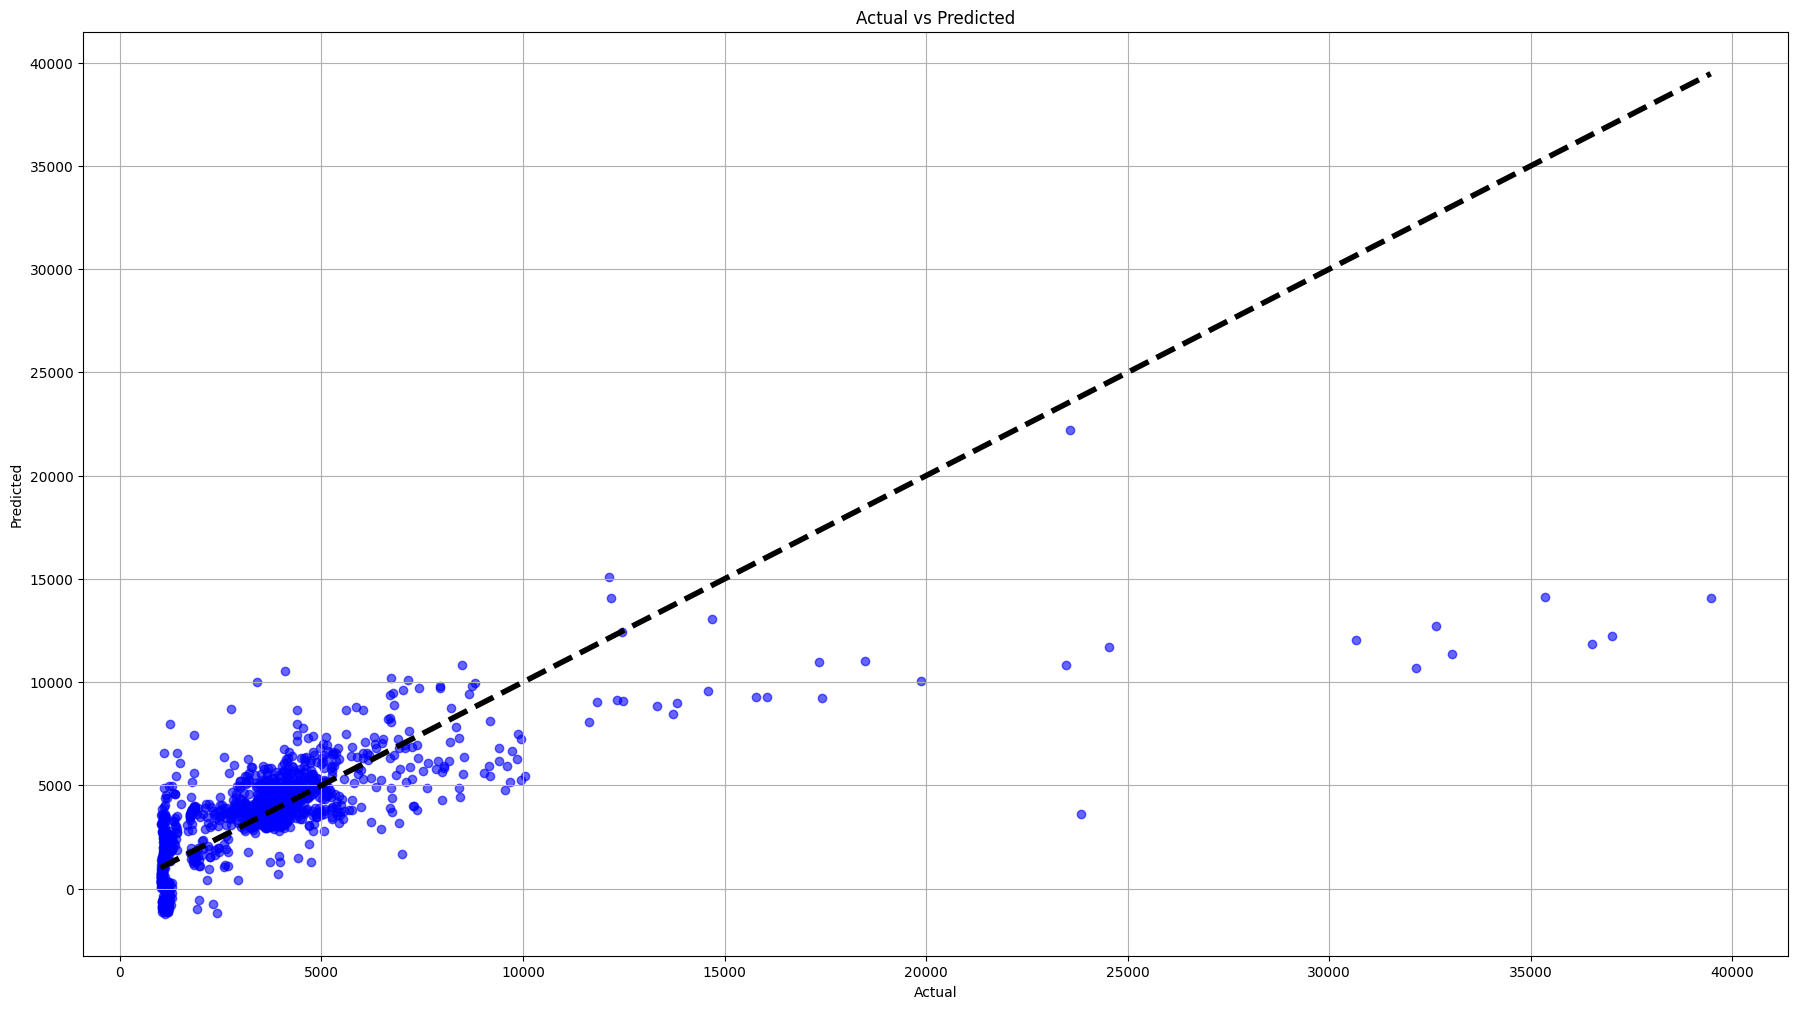

In [ ]:
plt.figure(figsize = (22,12))
plt.scatter(y_test,y_pred,color = "blue",alpha= 0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

Given these insights, the Linear Regression appears to be the most promising model for this task, balancing predictive accuracy and the ability to explain variance in the target variable.

### Measure the coefficient of determination (R2 score) for different dataset attributes. Also, visualize the results by scatter plots.

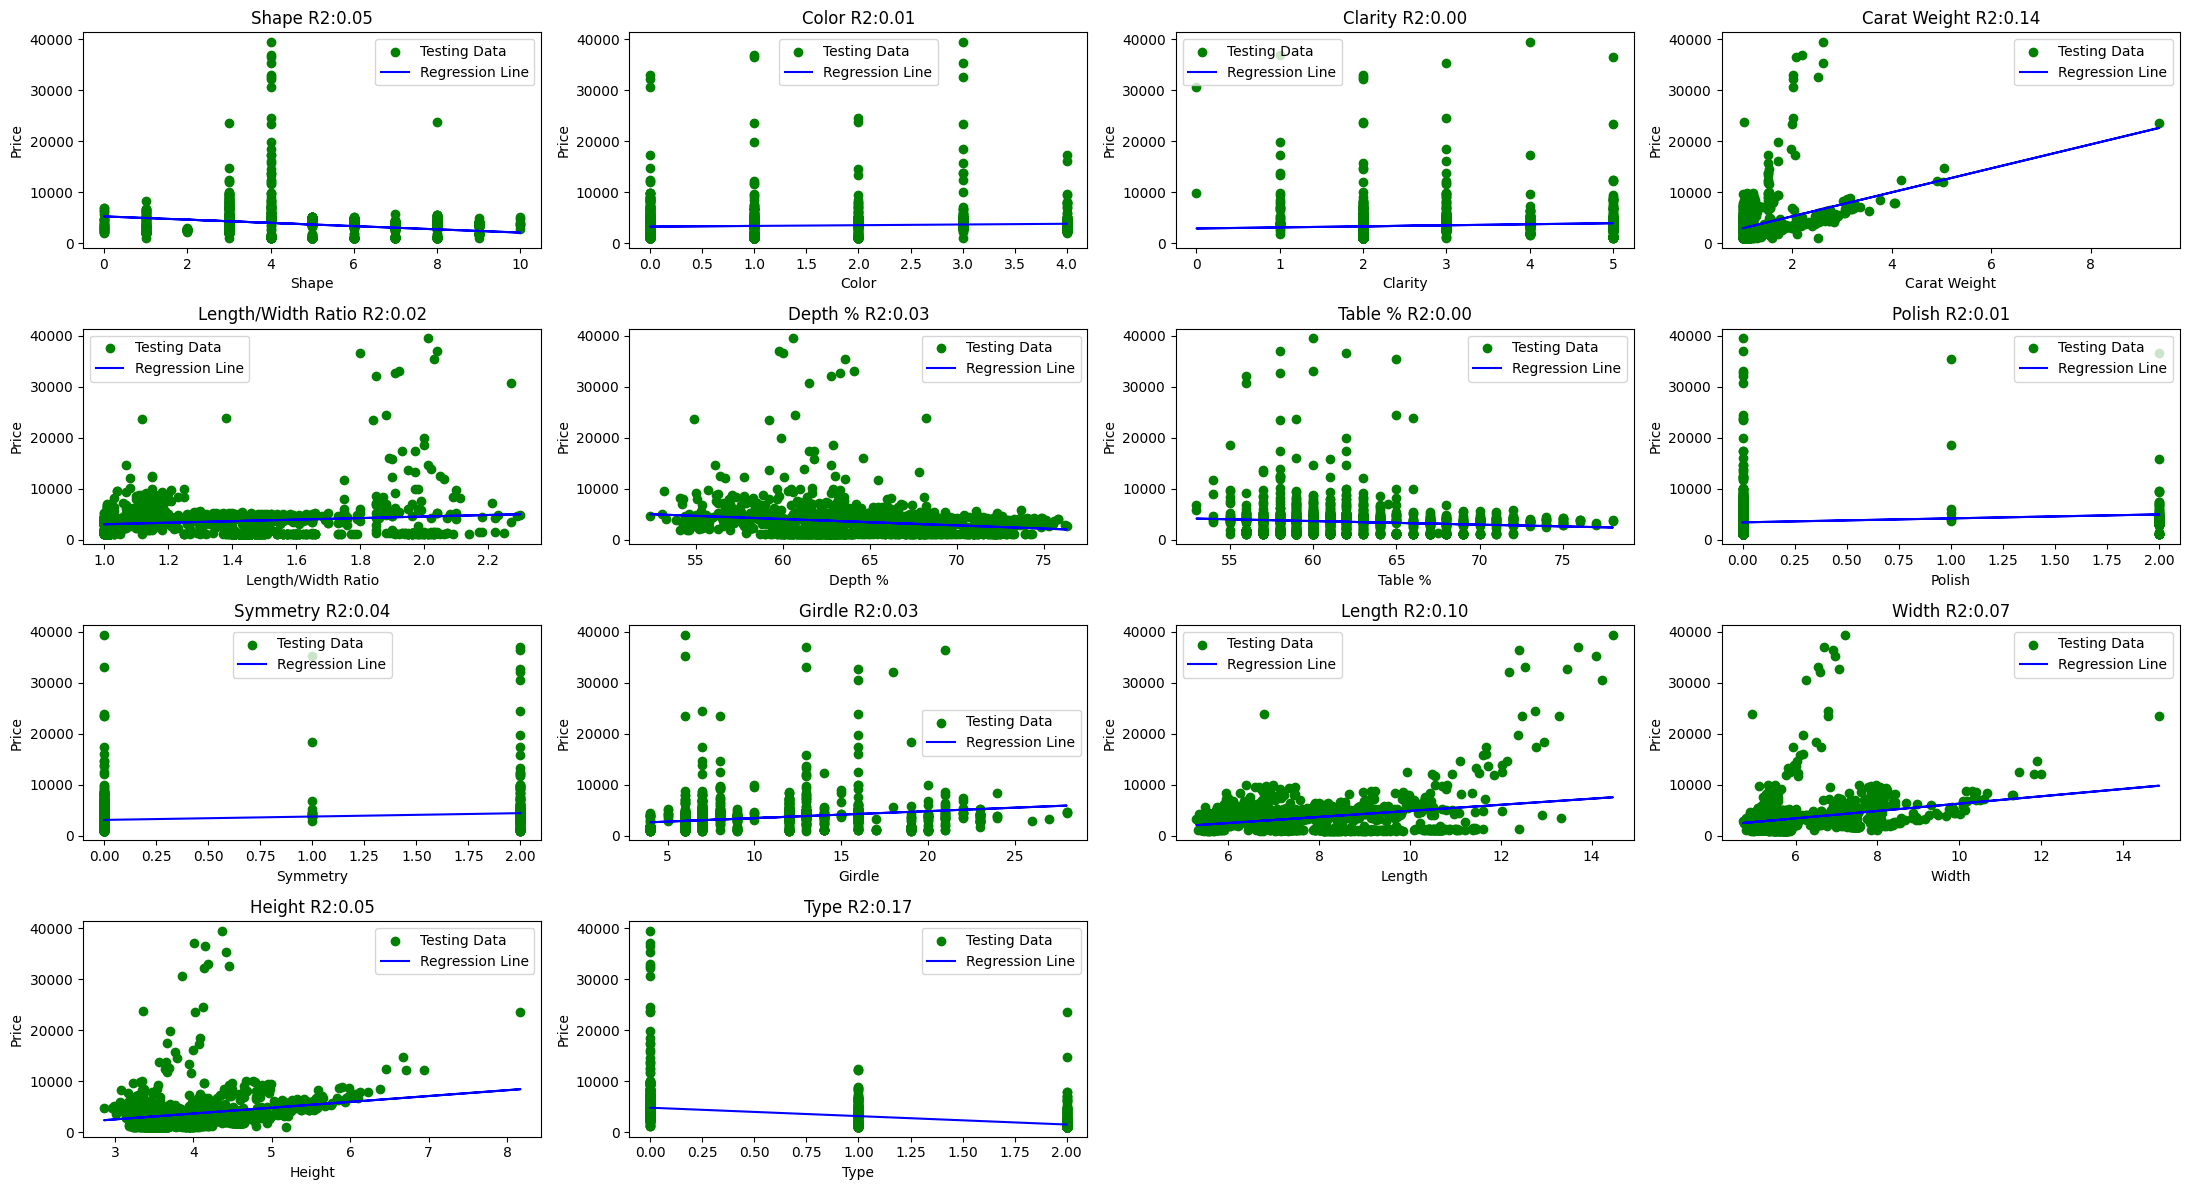

In [ ]:
# Assuming you are using the original dataset X for the feature names
R2_scores = {}
i = 0
plt.figure(figsize=(22, 12))

# Loop over each feature in the original X columns
for col in X.columns:

    # Ensure that you are accessing the correct column in X_train and X_test
    feature_train = X_train[col].values.reshape(-1, 1)
    feature_test = X_test[col].values.reshape(-1, 1)

    # Train the model
    model = LinearRegression()
    model.fit(feature_train, y_train)

    # Predict the target values using the test data
    y_pred = model.predict(feature_test)

    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    R2_scores[col] = r2

    # Plotting
    plt.subplot(4, 4, i + 1)
    plt.scatter(feature_test, y_test, color="green", label="Testing Data")
    plt.plot(feature_test, y_pred, color="blue", label="Regression Line")
    plt.title(f"{col} R2:{r2:.2f}")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.legend()
    i += 1

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
# Create a DataFrame from the R2_scores dictionary, with columns "Feature" and "R2 Score"
R2_df = pd.DataFrame(list(R2_scores.items()), columns = ["Feature", "R2 Score"])

# Sort the DataFrame by the "R2 Score" column in descending order to get the features with the highest R2 score at the top
R2_df.sort_values(by = "R2 Score", ascending = False, inplace = True)

# Display the sorted DataFrame
R2_df

Feature  R2 Score
13                Type  0.168460
3         Carat Weight  0.144256
10              Length  0.102418
11               Width  0.072457
12              Height  0.052712
0                Shape  0.045538
8             Symmetry  0.037038
9               Girdle  0.033640
5              Depth %  0.029692
4   Length/Width Ratio  0.017409
1                Color  0.007826
7               Polish  0.007388
6              Table %  0.004792
2              Clarity  0.000741

In [ ]:
# corr_maat_except_price = corr_matrix["Price"].drop(["Price"])
corr_maat_except_price = X_test.corrwith(y_test)

In [ ]:
corr_maat_except_price.rename("Correlation", inplace = True)

Shape                -0.215623
Color                 0.109994
Clarity               0.050108
Carat Weight          0.381810
Length/Width Ratio    0.137559
Depth %              -0.176285
Table %              -0.080997
Polish                0.096315
Symmetry              0.198963
Girdle                0.186596
Length                0.325237
Width                 0.274046
Height                0.235596
Type                 -0.411720
Name: Correlation, dtype: float64

In [ ]:
compare_df = pd.merge(R2_df, corr_maat_except_price, left_on = "Feature",right_index= True)
# compare_df["R2_expected"] = compare_df.Correlation **2

print(compare_df.sort_values(by = "R2 Score", ascending = False))

               Feature  R2 Score  Correlation
13                Type  0.168460    -0.411720
3         Carat Weight  0.144256     0.381810
10              Length  0.102418     0.325237
11               Width  0.072457     0.274046
12              Height  0.052712     0.235596
0                Shape  0.045538    -0.215623
8             Symmetry  0.037038     0.198963
9               Girdle  0.033640     0.186596
5              Depth %  0.029692    -0.176285
4   Length/Width Ratio  0.017409     0.137559
1                Color  0.007826     0.109994
7               Polish  0.007388     0.096315
6              Table %  0.004792    -0.080997
2              Clarity  0.000741     0.050108


The correlation values and R² scores align, showing that features with stronger absolute correlations (e.g., Type and Carat Weight) contribute more to price prediction. However, the overall low R² values indicate that no single feature explains price variation well, suggesting that price depends on multiple factors, potentially in a non-linear way. Features with weak correlations, like Clarity and Table %, have near-zero R² scores, confirming their minimal predictive power. This implies that more complex models, feature engineering, or non-linear approaches may be needed for better accuracy.

### Key Insights:
- **"Carat Weight"** is a clear, strong predictor of diamond price, which is consistent with common knowledge in the diamond industry.
- **"Type"** is an important categorical feature with a significant negative relationship with price, indicating that certain types of diamonds may be less expensive than others.
- Physical dimensions like **"Length," "Width," and "Height"** also contribute meaningfully to price prediction, although to a lesser extent than carat weight.
- Features like **"Shape," "Symmetry," and "Girdle"** have weaker predictive power but still show some relationship with price.
- **"Clarity," "Polish,"** and **"Table %"** are the least important features for price prediction in this analysis, suggesting that these characteristics may not significantly influence diamond pricing in the dataset being analyzed.

These observations can help guide further analysis, such as refining feature selection, or using more advanced models to capture complex relationships between features and the target variable.

# PROJECT PART - 4

# Clustering by diamond features

In clustering, we aim to group similar data points together based on their characteristics, without any predefined labels. For this dataset, we first preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features to ensure fair comparisons. Then, we apply different clustering algorithms—Agglomerative Clustering, K-Means, MiniBatch K-Means, and Mean-Shift—to identify natural groupings within the data. Finally, we evaluate the clusters using the Silhouette Score to determine which method best separates the data into meaningful clusters. This helps uncover hidden patterns and structures in the dataset.

## Elbow Method - Optimal k value

In [ ]:
!pip install kneed

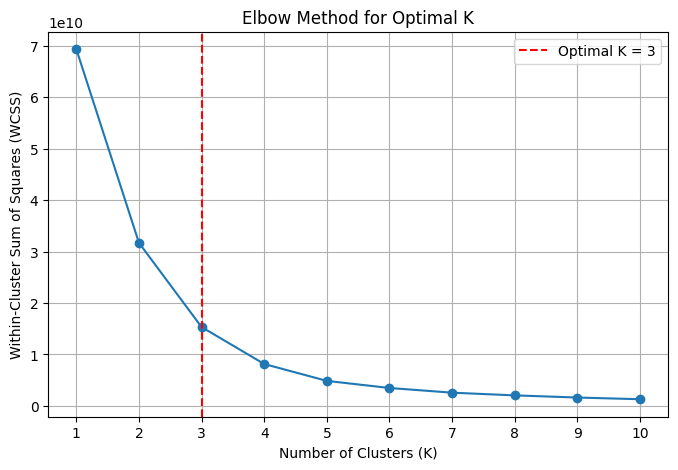

The optimal number of clusters (K) is: 3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Range of K values to test
k_values = range(1, 11)
wcss = []

# Compute WCSS for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Find the optimal K using KneeLocator
knee = KneeLocator(k_values, wcss, curve="convex", direction="decreasing")
optimal_k = knee.knee

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.axvline(optimal_k, linestyle="--", color="red", label=f"Optimal K = {optimal_k}")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

# Print the optimal K
print(f"The optimal number of clusters (K) is: {optimal_k}")


The Elbow Method plot above helps us determine the optimal number of clusters for K-Means clustering by looking at the point where the inertia (within-cluster sum of squares) starts to decrease at a slower rate. This point is often referred to as the "elbow" point. From the plot, it appears that the elbow point is 3 clusters, indicating that this might be the optimal number of clusters for our clinical score data.

## Clustering Methods

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Split X and y for clustering
X = df.drop('Type', axis=1)
y = df['Type']

# Train-test split for clustering
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Agglomerative Clustering

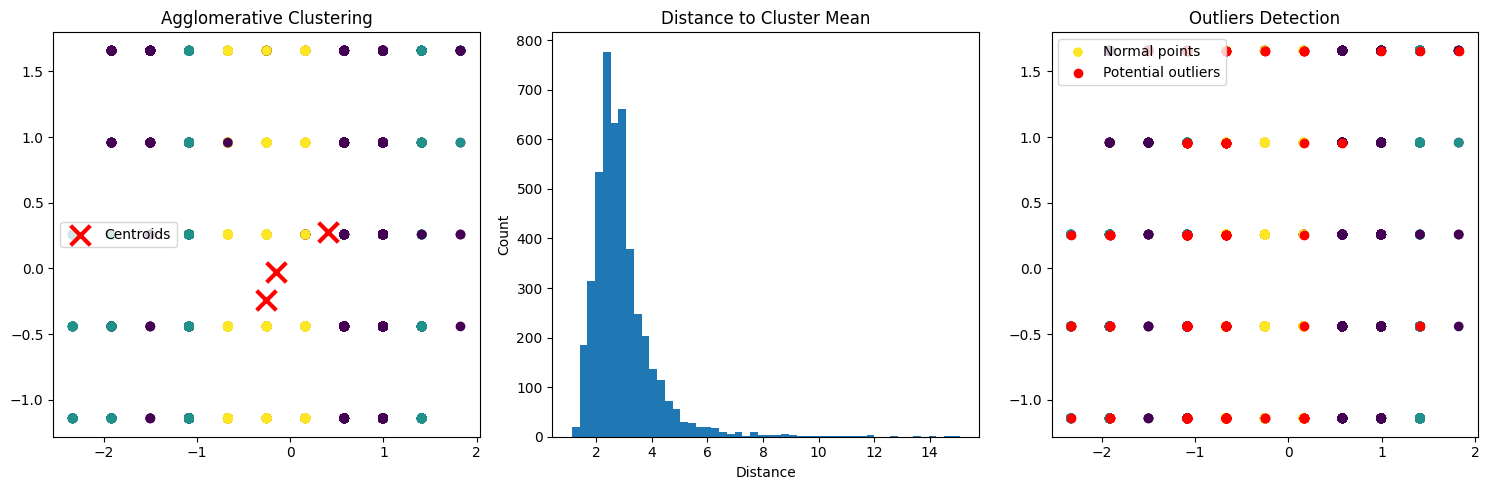


Agglomerative Clustering Results:
Silhouette Score: 0.208
Adjusted Rand Index: 0.037


In [ ]:
# 1. Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=optimal_k)
agglomerative_labels = agglomerative.fit_predict(X_train_scaled)

# Visualize Agglomerative Clustering Results
plt.figure(figsize=(15, 5))

# Plot 1: First two features
plt.subplot(1, 3, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Agglomerative Clustering')

# Mark cluster centroids
cluster_means = np.array([X_train_scaled[agglomerative_labels == i].mean(axis=0) for i in range(optimal_k)])
plt.scatter(cluster_means[:, 0], cluster_means[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroids')

plt.title('Agglomerative Clustering')
plt.legend()

# Plot 2: Distance to cluster average point (Euclidean distance to cluster mean)
cluster_means = np.array([X_train_scaled[agglomerative_labels == i].mean(axis=0) for i in range(optimal_k)])
distances = np.linalg.norm(X_train_scaled - cluster_means[agglomerative_labels], axis=1)
plt.subplot(1, 3, 2)
plt.hist(distances, bins=50)
plt.title('Distance to Cluster Mean')
plt.xlabel('Distance')
plt.ylabel('Count')

# Plot 3: Potential outliers
threshold = np.percentile(distances, 95)
outliers = distances > threshold
plt.subplot(1, 3, 3)
plt.scatter(X_train_scaled[~outliers, 0], X_train_scaled[~outliers, 1],
           c=agglomerative_labels[~outliers], cmap='viridis', label='Normal points')
plt.scatter(X_train_scaled[outliers, 0], X_train_scaled[outliers, 1],
           color='red', label='Potential outliers')
plt.title('Outliers Detection')
plt.legend()

plt.tight_layout()
plt.show()

print("\nAgglomerative Clustering Results:")
print(f"Silhouette Score: {silhouette_score(X_train_scaled, agglomerative_labels):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_train, agglomerative_labels):.3f}")


### K-Means Clustering

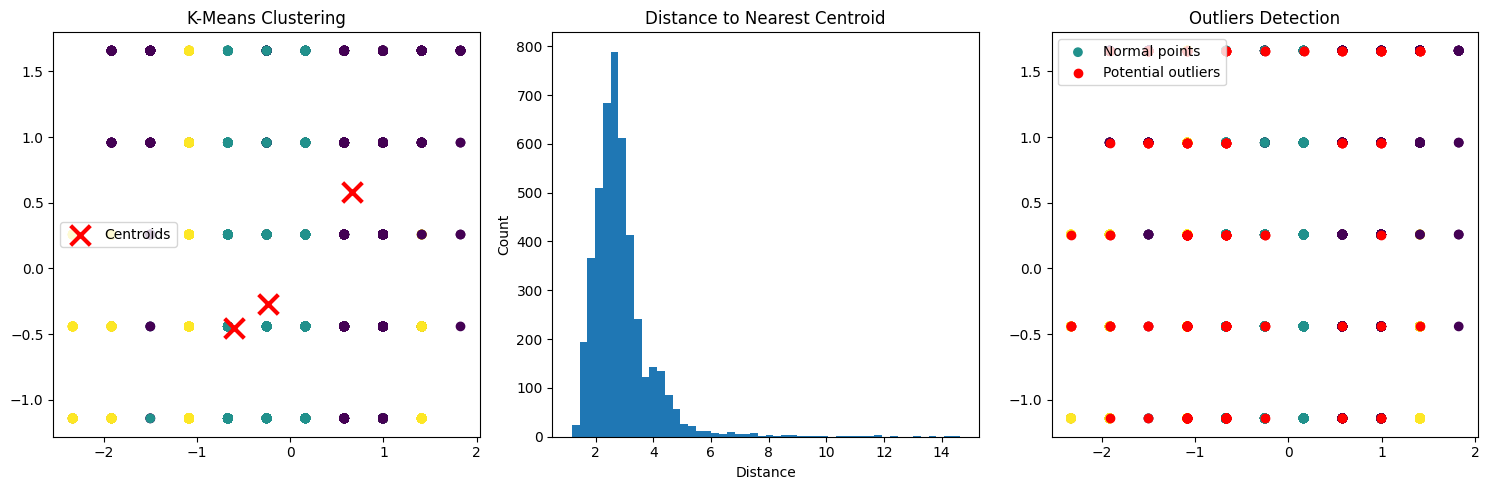


K-Means Results:
Silhouette Score: 0.227
Adjusted Rand Index: 0.086


In [ ]:
# 2. K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_scaled)

# Visualize K-Means results
plt.figure(figsize=(15, 5))

# Plot 1: First two features
plt.subplot(1, 3, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='x', s=200, linewidths=3, color='r', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()

# Plot 2: Distance to nearest centroid
distances = kmeans.transform(X_train_scaled).min(axis=1)
plt.subplot(1, 3, 2)
plt.hist(distances, bins=50)
plt.title('Distance to Nearest Centroid')
plt.xlabel('Distance')
plt.ylabel('Count')

# Plot 3: Potential outliers
threshold = np.percentile(distances, 95)
outliers = distances > threshold
plt.subplot(1, 3, 3)
plt.scatter(X_train_scaled[~outliers, 0], X_train_scaled[~outliers, 1],
           c=kmeans_labels[~outliers], cmap='viridis', label='Normal points')
plt.scatter(X_train_scaled[outliers, 0], X_train_scaled[outliers, 1],
           color='red', label='Potential outliers')
plt.title('Outliers Detection')
plt.legend()

plt.tight_layout()
plt.show()

print("\nK-Means Results:")
print(f"Silhouette Score: {silhouette_score(X_train_scaled, kmeans_labels):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_train, kmeans_labels):.3f}")


### MiniBatch K-Means Clustering

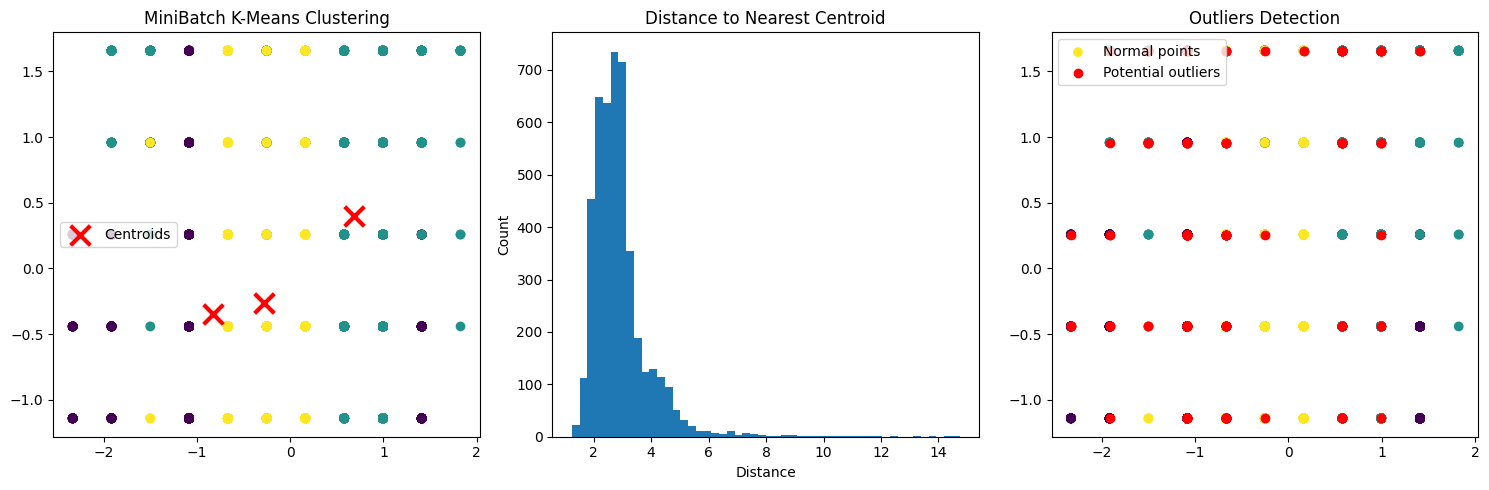


MiniBatch K-Means Results:
Silhouette Score: 0.226
Adjusted Rand Index: 0.086


In [ ]:
# 3. MiniBatch K-Means
minibatch_kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=3072)
minibatch_labels = minibatch_kmeans.fit_predict(X_train_scaled)

# Visualize MiniBatch K-Means results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=minibatch_labels, cmap='viridis')
plt.scatter(minibatch_kmeans.cluster_centers_[:, 0], minibatch_kmeans.cluster_centers_[:, 1],
           marker='x', s=200, linewidths=3, color='r', label='Centroids')
plt.title('MiniBatch K-Means Clustering')
plt.legend()

distances = minibatch_kmeans.transform(X_train_scaled).min(axis=1)
plt.subplot(1, 3, 2)
plt.hist(distances, bins=50)
plt.title('Distance to Nearest Centroid')
plt.xlabel('Distance')
plt.ylabel('Count')

threshold = np.percentile(distances, 95)
outliers = distances > threshold
plt.subplot(1, 3, 3)
plt.scatter(X_train_scaled[~outliers, 0], X_train_scaled[~outliers, 1],
           c=minibatch_labels[~outliers], cmap='viridis', label='Normal points')
plt.scatter(X_train_scaled[outliers, 0], X_train_scaled[outliers, 1],
           color='red', label='Potential outliers')
plt.title('Outliers Detection')
plt.legend()

plt.tight_layout()
plt.show()

print("\nMiniBatch K-Means Results:")
print(f"Silhouette Score: {silhouette_score(X_train_scaled, minibatch_labels):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_train, minibatch_labels):.3f}")

### Mean-Shift Clustering

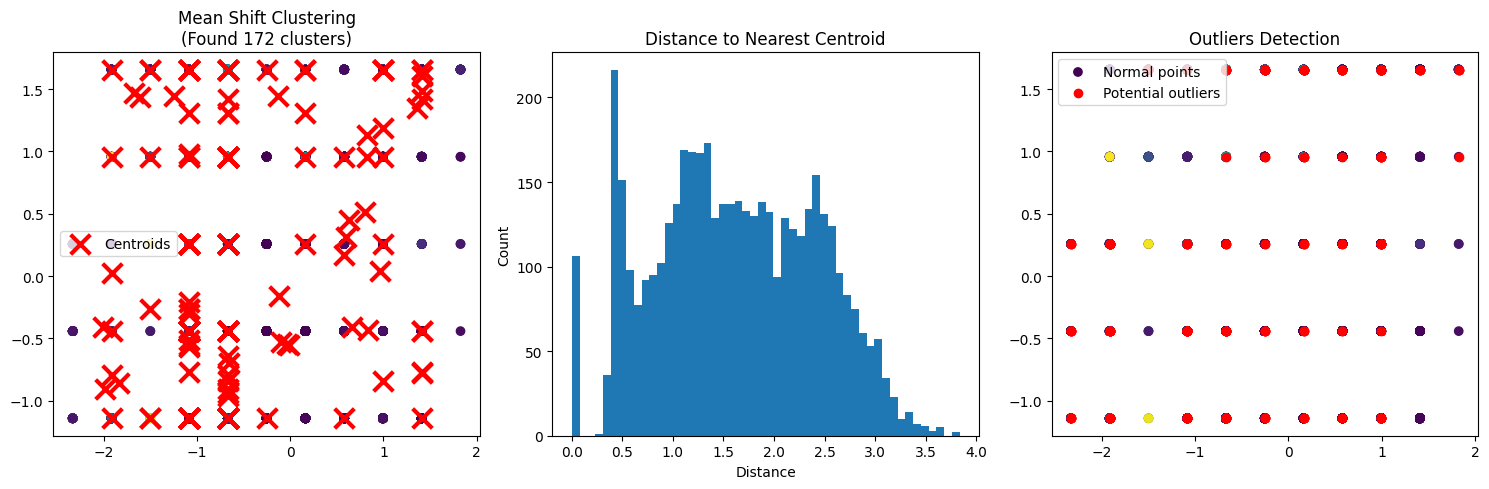


Mean Shift Results:
Number of clusters found: 172
Silhouette Score: 0.210
Adjusted Rand Index: 0.056


In [ ]:
# 4. Mean Shift
meanshift = MeanShift(bandwidth=2)  # bandwidth can be adjusted
meanshift_labels = meanshift.fit_predict(X_train_scaled)

# Visualize Mean Shift results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=meanshift_labels, cmap='viridis')
plt.scatter(meanshift.cluster_centers_[:, 0], meanshift.cluster_centers_[:, 1],
           marker='x', s=200, linewidths=3, color='r', label='Centroids')
plt.title(f'Mean Shift Clustering\n(Found {len(np.unique(meanshift_labels))} clusters)')
plt.legend()

distances = []
for i in range(len(X_train_scaled)):
    cluster_idx = meanshift_labels[i]
    dist = np.linalg.norm(X_train_scaled[i] - meanshift.cluster_centers_[cluster_idx])
    distances.append(dist)
distances = np.array(distances)

plt.subplot(1, 3, 2)
plt.hist(distances, bins=50)
plt.title('Distance to Nearest Centroid')
plt.xlabel('Distance')
plt.ylabel('Count')

threshold = np.percentile(distances, 95)
outliers = distances > threshold
plt.subplot(1, 3, 3)
plt.scatter(X_train_scaled[~outliers, 0], X_train_scaled[~outliers, 1],
           c=meanshift_labels[~outliers], cmap='viridis', label='Normal points')
plt.scatter(X_train_scaled[outliers, 0], X_train_scaled[outliers, 1],
           color='red', label='Potential outliers')
plt.title('Outliers Detection')
plt.legend()

plt.tight_layout()
plt.show()

print("\nMean Shift Results:")
print(f"Number of clusters found: {len(np.unique(meanshift_labels))}")
print(f"Silhouette Score: {silhouette_score(X_train_scaled, meanshift_labels):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_train, meanshift_labels):.3f}")

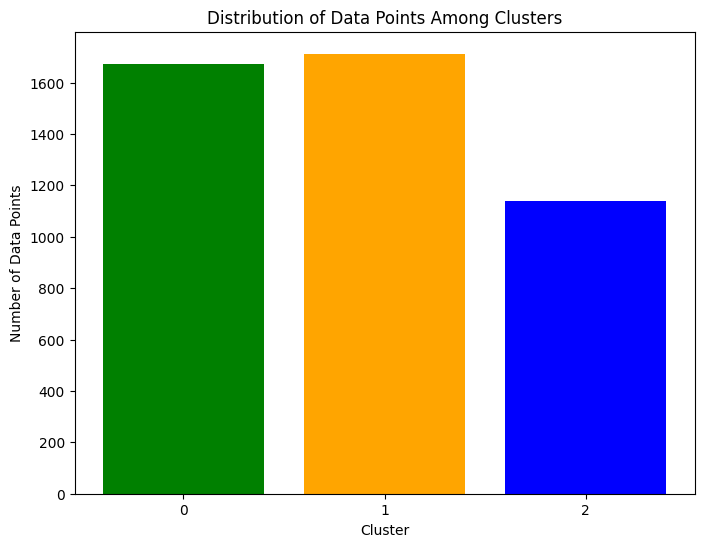

[1673 1712 1139]


In [ ]:
import numpy as np

# Compute the counts of each label
cluster_distribution = np.bincount(kmeans_labels)

# Plotting the distribution of clusters
plt.figure(figsize=(8, 6), facecolor='white')
plt.bar(range(len(cluster_distribution)), cluster_distribution, color=['green', 'orange', 'blue'])
plt.title('Distribution of Data Points Among Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks([0, 1, 2])
plt.show()

print(cluster_distribution)


After applying different clustering algorithms to the dataset and evaluating their performance using Silhouette Score and Adjusted Rand Index (ARI),
We got the results as follows:

Agglomerative Clustering Results:<br/>
Silhouette Score: 0.208<br/>
Adjusted Rand Index: 0.037<br/>

K-Means Results:<br/>
Silhouette Score: 0.227<br/>
Adjusted Rand Index: 0.086<br/>


MiniBatch K-Means Results:<br/>
Silhouette Score: 0.226<br/>
Adjusted Rand Index: 0.086<br/>


Mean Shift Results:<br/>
Number of clusters found: 172<br/>
Silhouette Score: 0.210<br/>
Adjusted Rand Index: 0.056<br/>


### Conclusion
- Silhouette Score measures how well data points fit within their assigned clusters higher is better.  
  K-Means achieved the highest silhouette score indicating that it formed the most well-separated and cohesive clusters compared to the other methods.
  
- Adjusted Rand Index (ARI) evaluates the similarity between the predicted clusters and the ground truth labels (higher is better).  
  Again K-Means achieved the highest ARI 0.086, meaning its cluster assignments aligned more closely with the actual data structure.


Based on the evaluation metrics, K-Means is the most suitable clustering algorithm for this dataset


# Classification

The task is to classify diamonds into categories based on their features, such as price range or quality. This can be done by first preprocessing the data (handling missing values, encoding categorical variables, and scaling numerical features), then selecting an appropriate classification model like Random Forest or Logistic Regression. The model is trained on labeled data and evaluated using metrics like accuracy and confusion matrix. Finally, the trained model can be used to predict the class of new, unseen diamonds based on their features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# X and y split for clasifation
X = df.drop(columns=["Type"])  # Features
y = df["Type"]  # Target

# Split the Data into Training and Testing Sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [ ]:
# (i) Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8878576952822892
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       682
           1       0.71      0.70      0.71       238
           2       0.81      0.82      0.81       373

    accuracy                           0.89      1293
   macro avg       0.84      0.84      0.84      1293
weighted avg       0.89      0.89      0.89      1293



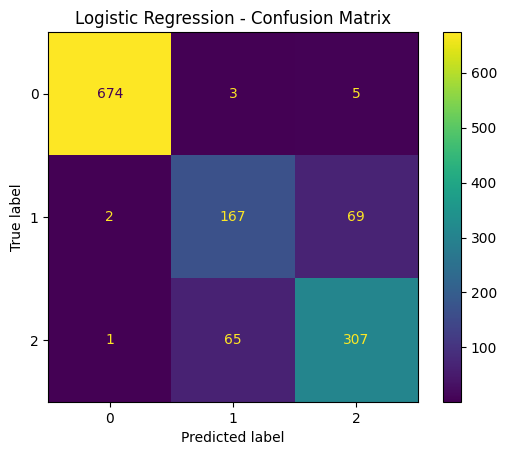

In [ ]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

## K-Nearest Neighbors (KNN)

In [ ]:
# (ii) K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 0.9156999226604795
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       682
           1       0.79      0.77      0.78       238
           2       0.85      0.88      0.87       373

    accuracy                           0.92      1293
   macro avg       0.88      0.88      0.88      1293
weighted avg       0.92      0.92      0.92      1293



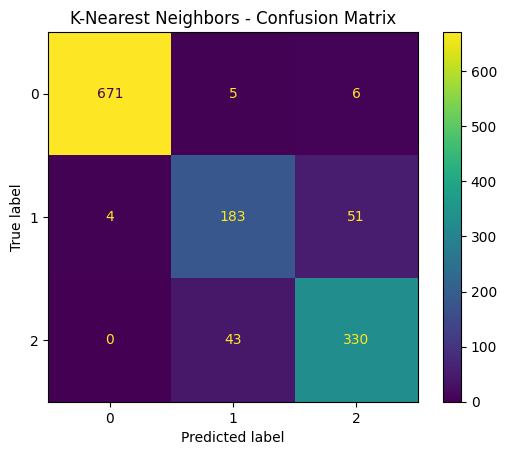

In [ ]:
# K-Nearest Neighbors Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.title("K-Nearest Neighbors - Confusion Matrix")
plt.show()

## Decision Trees

In [ ]:
# (iii) Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Trees Accuracy:", dt_accuracy)
print(classification_report(y_test, y_pred_dt))

Decision Trees Accuracy: 0.9280742459396751
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       682
           1       0.81      0.81      0.81       238
           2       0.88      0.90      0.89       373

    accuracy                           0.93      1293
   macro avg       0.90      0.90      0.90      1293
weighted avg       0.93      0.93      0.93      1293



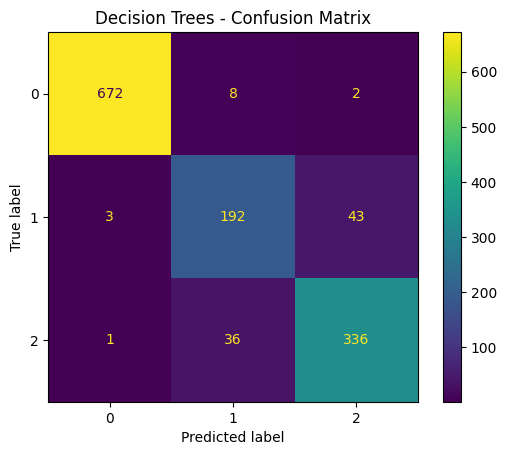

In [ ]:
# Decision Trees Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.title("Decision Trees - Confusion Matrix")
plt.show()

## Support Vector Machine (SVM)

In [ ]:
# (iv) Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", svm_accuracy)
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.9211136890951276
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       682
           1       0.78      0.82      0.80       238
           2       0.88      0.86      0.87       373

    accuracy                           0.92      1293
   macro avg       0.88      0.89      0.89      1293
weighted avg       0.92      0.92      0.92      1293



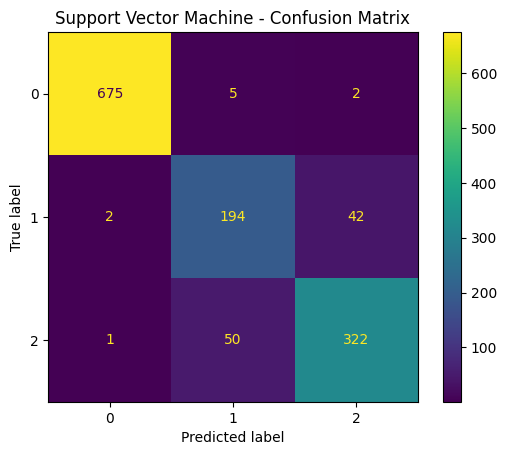

In [ ]:
# SVM Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title("Support Vector Machine - Confusion Matrix")
plt.show()

## Gaussian Naive Bayes classifier

In [ ]:
# (v) Gaussian Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7509667440061871
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       682
           1       0.57      0.27      0.37       238
           2       0.60      0.90      0.72       373

    accuracy                           0.75      1293
   macro avg       0.70      0.67      0.66      1293
weighted avg       0.76      0.75      0.74      1293



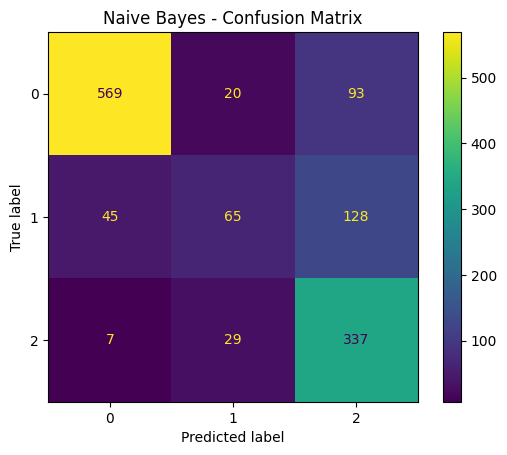

In [ ]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

In [ ]:
# Compare Results
print("\nModel Performance Summary:")
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.2f}")
print(f"Decision Trees Accuracy: {dt_accuracy:.2f}")
print(f"Support Vector Machine Accuracy: {svm_accuracy:.2f}")
print(f"Naive Bayes Gaussian Naive Bayes classifier: {nb_accuracy:.2f}")


Model Performance Summary:
Logistic Regression Accuracy: 0.89
K-Nearest Neighbors Accuracy: 0.92
Decision Trees Accuracy: 0.93
Support Vector Machine Accuracy: 0.92
Naive Bayes Gaussian Naive Bayes classifier: 0.75


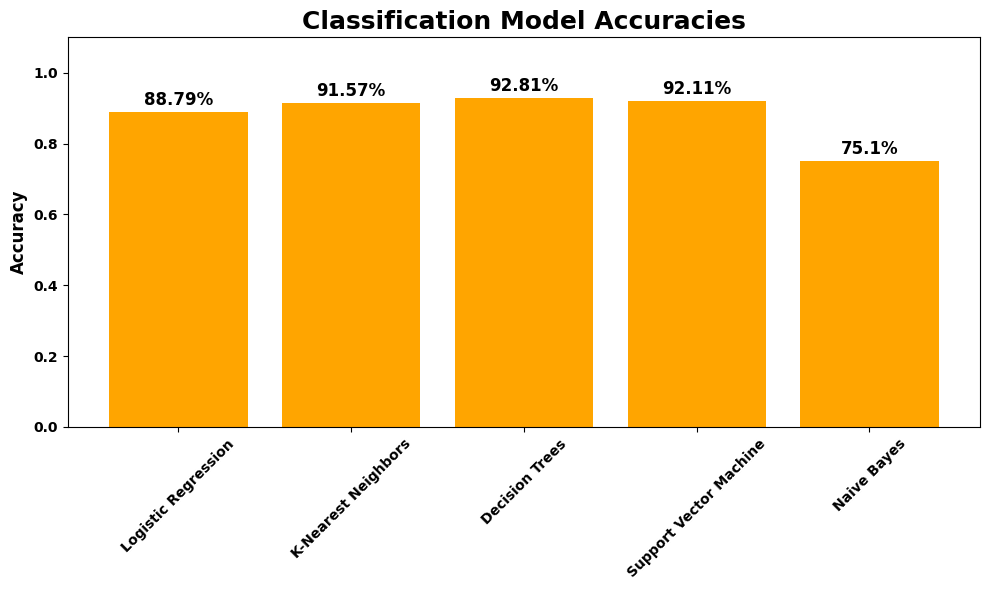

In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracies
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Trees',
               'Support Vector Machine','Naive Bayes']

accuracies = [lr_accuracy, knn_accuracy, dt_accuracy, svm_accuracy, nb_accuracy]

# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(model_names, accuracies, color='orange')
#plt.xlabel('Classification Model')
plt.ylabel('Accuracy',fontweight='bold',fontsize=12)
plt.title('Classification Model Accuracies',fontweight='bold',fontsize=18)
plt.xticks(rotation=45, fontweight='bold')  # Make x-labels bold
plt.yticks(fontweight='bold')  # Make y-labels bold
plt.ylim(0, 1.1)  # Extend y-axis to fit the Decision Trees

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, str(round(v*100, 2))+'%', ha='center',fontweight='bold',fontsize=12)

plt.tight_layout()
plt.show()


Based on these results, the Decision Trees classifier performed the best in terms of accuracy, making it the most effective model for this task among the ones tested. The Decision Trees model's success could be attributed to its ability to handle independence assumptions between features effectively, which seems to suit this particular dataset well.

## Conclusion :

In this project, we successfully applied clustering and classification techniques to Diamonds dataset. For clustering, we explored four algorithms: Agglomerative, K-Means, Mini-Batch K-Means, and Mean-Shift. By evaluating silhouette scores, K-Means emerged as the most suitable method, achieving the highest score. It also identified potential outliers in the data.

For classification, our goal was to classify the diamonds based on its features. We implemented five machine learning algorithms: Logistic Regression, K-Nearest Neighbors, Decision Trees, Support Vector Machine and Naive Bayes. The Decision Trees classifier demonstrated the highest accuracy of 0.93, outperforming the other methods.

Overall, this project showcased the application of unsupervised and supervised learning techniques on a real-world diamonds dataset. The findings, particularly the effectiveness of the Decision Trees classifier, provide valuable insights into developing a model that analyzes and classifies the diamonds efficiently.



## Reflection on Key Learnings and Difficulties

While working on this assignment, we gained a clear understanding of the difference between supervised learning techniques, such as classification,
and unsupervised learning techniques, such as clustering.
We explored the distinctions between classification and clustering, enhancing our conceptual grasp of both approaches.
We also studied various classification algorithms, including Logistic Regression, K-Nearest Neighbors (KNN), Decision Trees, Gaussian Naive Bayes and Support Vector Machine (SVM).
Additionally, we learned about clustering methods like Agglomerative Clustering, K-means, Mini-batch K-means, and Mean-shift.
 We became familiar with evaluation metrics such as accuracy, classification reports, and confusion matrices for classification, and
 the Silhouette Score for assessing clustering performance.



## Difficulites

1. We accidentally use test data while training. This makes the evaluation meaningless because the model has already seen the answers.
2. Algorithms like kmeans, logistic regression, KNN, SVC requires scaled data.
3. Choosing k without understanding. We choose k=1. Too small k leads to overfitting, on the train data and very bad result on the test.
4. We run the same code multiple times and get different results. We forget to set random_state in train_test_split to get same result.
5. We forget that clustering is unsupervised it doesn't know the correct labels.